In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9121265377855887

* 정밀도

In [4]:
from sklearn.metrics import precision_score
precision_score(y,y_pred)

0.900990099009901

* 재현율

In [5]:
from sklearn.metrics import recall_score
recall_score(y,y_pred)

0.8584905660377359

* F1 score

In [6]:
from sklearn.metrics import f1_score
f1_score(y,y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [19]:
import numpy as np

from sklearn.preprocessing import Binarizer
y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [25]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# 혼동행렬
print(confusion_matrix(y,y_pred2))
# 정확도
print(accuracy_score(y, y_pred2))
# 정밀도
print(precision_score(y,y_pred2))
# 재현율
print(recall_score(y,y_pred2))
# f1 score
print(f1_score(y, y_pred2))

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [27]:
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)

fpr, tpr, thresholds = roc_curve(y, probas[:,1])

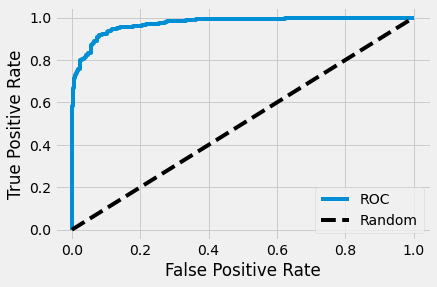

In [33]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1],'k--',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

* ROC AUC 값

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, probas[:,1])

0.9741557000158554